# Loading the Preprocessed Data

In [1]:
import os
import numpy as np

# Load the arrays
X_train = np.load('../Dataset/Train Test Dataset - Feature 8/X_train.npy')
X_test = np.load('../Dataset/Train Test Dataset - Feature 8/X_test.npy')
y_train = np.load('../Dataset/Train Test Dataset - Feature 8/y_train.npy')
y_test = np.load('../Dataset/Train Test Dataset - Feature 8/y_test.npy')

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Deep Learning Architecture - GRU</h2>
    
</div>


# Importing Libraries - Architecture

In [2]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

### Reshaping X_train for GRU

In [3]:
X_train_array = X_train  
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])

In [4]:
input_shape

(8, 1)

# 1. Network Initialization

In [5]:
batch_size = 700  
epochs = 500  
learning_rate = 0.001

# 2. Define Architecture

In [6]:
gru_model = Sequential([
    
    GRU(512, input_shape=input_shape, activation='relu', return_sequences=True),
    Dropout(0.1),
    GRU(256, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')

])

In [7]:
gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 8, 512)            791040    
                                                                 
 dropout (Dropout)           (None, 8, 512)            0         
                                                                 
 gru_1 (GRU)                 (None, 256)               591360    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,382,657
Trainable params: 1,382,657
Non-trainable params: 0
_________________________________________________________________


# 3. Model Compilation

In [8]:
gru_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Integrating Callbacks</h2>
    
</div>


## EarlyStopping Callback

In [9]:
from keras.callbacks import EarlyStopping

In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

## Model Checkpoints Callback

In [11]:
import os
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [12]:
checkpoint_path = '/Model Checkpoints/GRU_Model_Checkpoint.h5'

### Check if the checkpoint file exists

In [13]:
if os.path.exists(checkpoint_path):
    print("Loading model from checkpoint...")
    model = load_model(checkpoint_path)
else:
    print("Checkpoint not found. Initializing new model...")

Loading model from checkpoint...


### Create the checkpoint callback

In [14]:
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min'
)

# 4. Fit Network

In [15]:
start_time = time.time()

history = gru_model.fit(X_train_reshaped, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.1,
                         callbacks=[checkpoint, early_stopping], 
                         verbose=1)

end_time = time.time()

training_time = end_time - start_time
print("Training Time: ", training_time, "seconds")

Epoch 1/500
799/799 [==============================] - ETA: 0s - loss: 0.6342 - accuracy: 0.6338
Epoch 1: val_loss improved from inf to 0.60968, saving model to /Model Checkpoints\GRU_Model_Checkpoint.h5
799/799 [==============================] - 367s 450ms/step - loss: 0.6342 - accuracy: 0.6338 - val_loss: 0.6097 - val_accuracy: 0.6575
Epoch 2/500
799/799 [==============================] - ETA: 0s - loss: 0.5888 - accuracy: 0.6753
Epoch 2: val_loss improved from 0.60968 to 0.56558, saving model to /Model Checkpoints\GRU_Model_Checkpoint.h5
799/799 [==============================] - 364s 455ms/step - loss: 0.5888 - accuracy: 0.6753 - val_loss: 0.5656 - val_accuracy: 0.6898
Epoch 3/500
799/799 [==============================] - ETA: 0s - loss: 0.5476 - accuracy: 0.7056
Epoch 3: val_loss improved from 0.56558 to 0.52513, saving model to /Model Checkpoints\GRU_Model_Checkpoint.h5
799/799 [==============================] - 363s 454ms/step - loss: 0.5476 - accuracy: 0.7056 - val_loss: 0.525

# Saving the model and training history 

In [16]:
gru_model.save('GRU_Architecture_8_Features.h5')
np.save('GRU_history_8_Features.npy', history.history)

# 5. Model Evaluation

# Importing Libraries - Evaluation

In [17]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Plotting Loss and Accuracy Curve

### Loss Curve

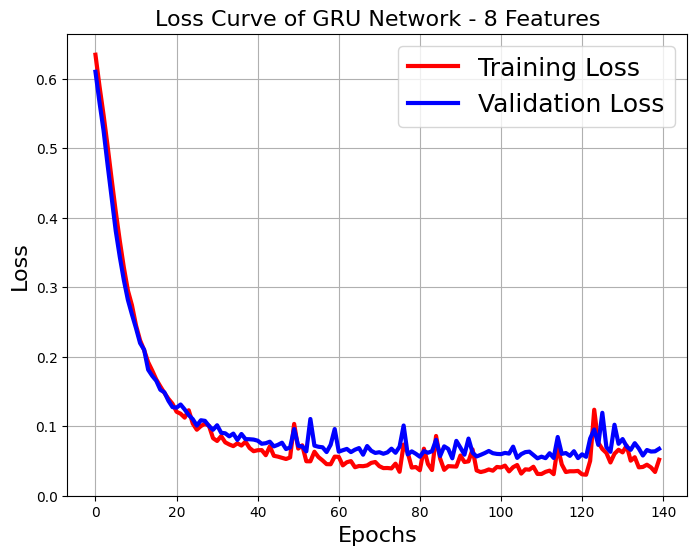

In [18]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.title('Loss Curve of GRU Network - 8 Features', fontsize=16)

plt.grid(True)
plt.show()

### Accuracy Curve

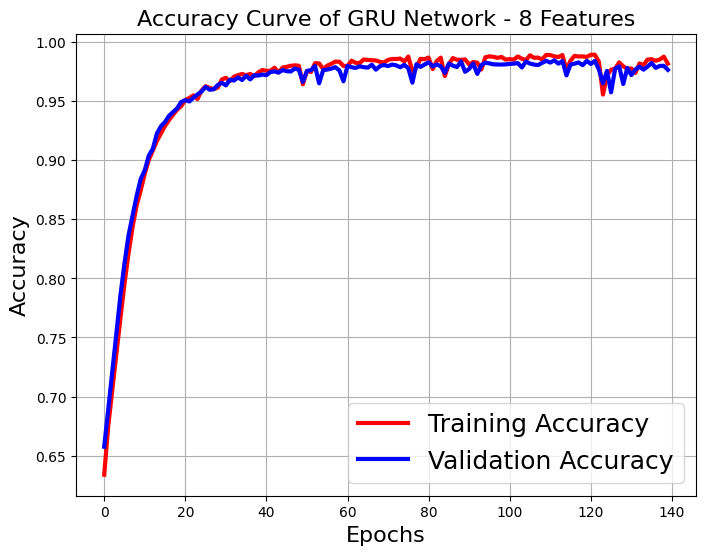

In [19]:
plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.title('Accuracy Curve of GRU Network - 8 Features', fontsize=16)

plt.grid(True)
plt.show()

### Reshaping X_test for LSTM Model Evaluation

In [20]:
X_test_array = X_test
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

In [21]:
X_test_reshaped

array([[[ 0.46349357],
        [ 0.36358773],
        [ 3.37428511],
        ...,
        [ 1.19729591],
        [ 0.51350794],
        [ 0.27797617]],

       [[-3.12902325],
        [-2.41096786],
        [-4.83420457],
        ...,
        [-3.49186801],
        [-2.52117481],
        [-1.38013389]],

       [[ 1.56338732],
        [ 1.49249955],
        [ 1.91877559],
        ...,
        [ 1.09955917],
        [ 0.67026206],
        [ 0.76520671]],

       ...,

       [[ 0.69592067],
        [ 0.84838968],
        [-0.60272074],
        ...,
        [ 0.58434382],
        [ 0.11607025],
        [ 0.67028264]],

       [[ 2.17107007],
        [ 2.96016373],
        [ 3.46610892],
        ...,
        [ 2.4330017 ],
        [ 1.85676497],
        [ 1.06099164]],

       [[ 0.16525652],
        [-0.05828783],
        [-0.23818711],
        ...,
        [ 0.38970464],
        [-0.59518656],
        [-0.2390997 ]]])

###  Make predictions on test data

In [22]:
y_pred_prob = gru_model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to classes

4853/4853 [==============================] - 79s 16ms/step


# Classification Report

In [23]:
test_loss, test_accuracy = gru_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

Test accuracy: 0.98, Test loss: 0.06


In [24]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     77676
           1       0.98      0.98      0.98     77614

    accuracy                           0.98    155290
   macro avg       0.98      0.98      0.98    155290
weighted avg       0.98      0.98      0.98    155290



# Confusion Matrix

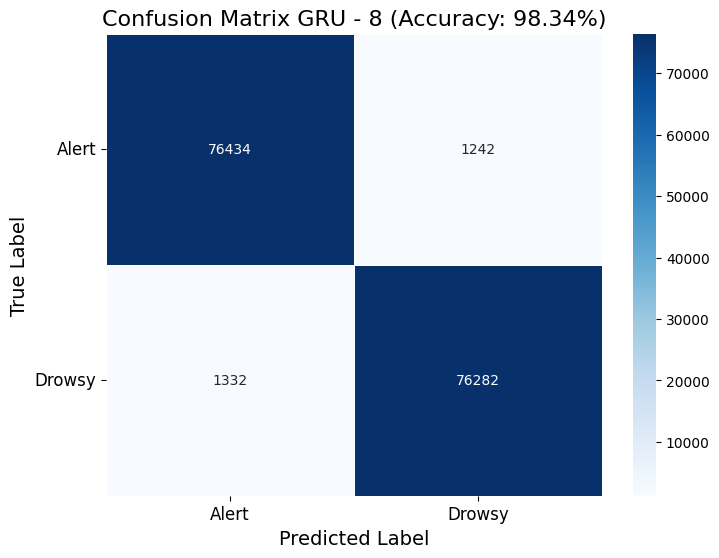

In [25]:
class_labels = ["Alert", "Drowsy"]

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Confusion Matrix GRU - 8 (Accuracy: {accuracy:.2f}%)', fontsize=16)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(rotation=0, fontsize=12)  

plt.show()

# Evaluation Metrics

In [26]:
# Calculate accuracy, precision, recall, F1-score, AUC-ROC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.9834245604997102
Precision: 0.9839791548423714
Recall: 0.982838147756848
F1-score: 0.9834083203341542
AUC-ROC: 0.997866659501527


# Receiver Operating Characteristic (ROC) Curve

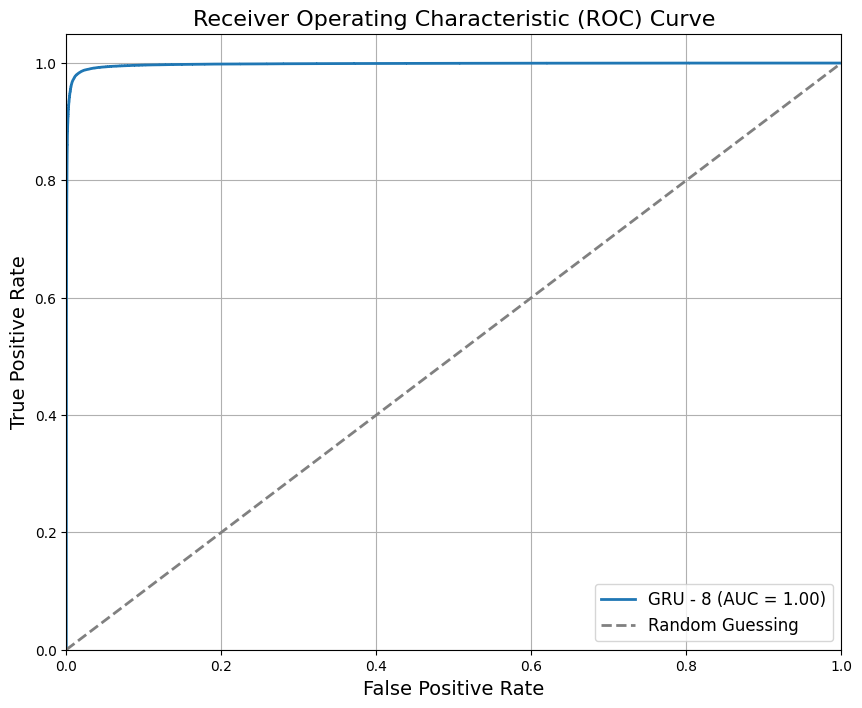

In [27]:
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_data['GRU - 8'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curves 
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()